In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gzip
import math
import sys

In [2]:
json_file = 'stations.json.gz'
city_data_file = 'city_data.csv'
output_file = 'output.svg'

In [3]:
# Used previously in Exercise 3
def degree2Rad(degree):
    return (degree * math.pi/180)

# Used previously in Exercise 3, modified
# Idea from https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula/21623206
def haversine(lat1, lon1, lat2, lon2):
    # Earth radius in meters
    earthRadius = 6371000
    
    # Convert latitudes to radians
    lat_diff = degree2Rad(lat2 - lat1)
    lon_diff = degree2Rad(lon2 - lon1)
    
    # Apply calculation
    a = math.sin(lat_diff/2)**2 + math.cos(degree2Rad(lat1)) * math.cos(degree2Rad(lat2)) * math.sin(lon_diff/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    return (earthRadius * c)

In [4]:
# Return distances between a city and all stations
def distance(city, stations):
    return np.vectorize(haversine)(stations['latitude'], stations['longitude'], city['latitude'], city['longitude'])

# Return the closest station to a city
def best_tmax(city, stations):
    distances = distance(city, stations)
    avg_tmax = stations['avg_tmax']
    return avg_tmax[np.argmin(distances)]

In [5]:
# Import stations and cities
cities = pd.read_csv(city_data_file)
stations = pd.read_json(json_file, lines=True)

In [6]:
# Convert avg_tmax to Celcius
stations['avg_tmax'] = stations['avg_tmax']/10

In [7]:
# Convert city areas to km^2
cities['area'] = cities['area'] * 0.000001 #(10^(-6))
# Filter out cities larger than 10000 km^2
cities = cities[cities['area'] <= 10000]

In [8]:
# Get best_tmax cities
cities['best_tmax'] = cities.apply(best_tmax, stations=stations, axis=1)

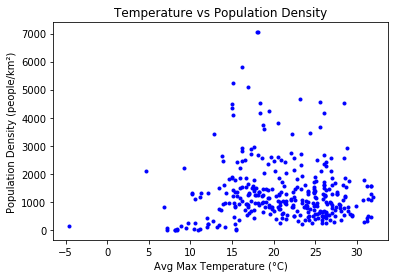

In [9]:
# Produce plot and labels
plt.ylabel('Population Density (people/km\u00b2)')
plt.xlabel('Avg Max Temperature (\u00b0C)')
plt.title('Temperature vs Population Density')
plt.plot(cities['best_tmax'], cities['population']/cities['area'], "b.")

In [10]:
# Save plot as svg
plt.savefig(output_file)

<Figure size 432x288 with 0 Axes>